# Assessment 2: Mushroom classification
-------------------------------------------------------------------------------------
## Brief
In this assessment, the student is tasked with creating a gradio application that uses any type of regressions they learned in this module. 

-------------------------------------------------------------------------------------
## Setup
For this activity, the student chose to work on a dataset on mushroom classification containing 8124 records with the following 23 attributes:
1. **classification**: edible=e, poisonous=p
2. **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
3. **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
4. **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
5. **bruises**: bruises=t, no=f
6. **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
7. **gill-attachment**: attached=a, descending=d, free=f, notched=n
8. **gill-spacing**: close=c, crowded=w, distant=d
9. **gill-size**: broad=b, narrow=n
10. **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
11. **stalk-shape**: enlarging=e, tapering=t
12. **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
13. **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
14. **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
15. **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
17. **veil-type**: partial=p, universal=u
18. **veil-color**: brown=n, orange=o, white=w, yellow=y
19. **ring-number**: none=n, one=o, two=t
20. **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
21. **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
22. **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
23. **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc, accuracy_score, average_precision_score, precision_score, precision_recall_curve, recall_score, roc_auc_score, roc_curve, f1_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Information on Dataset 

In [2]:
data.head(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
data.tail(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8104,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,n,v,l
8105,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,y,v,l
8106,e,k,s,n,f,n,a,c,b,o,...,s,o,o,p,o,o,p,n,v,l
8107,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,n,c,l
8108,p,k,y,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
8109,e,b,s,w,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,n,g
8110,e,x,s,n,f,n,a,c,b,o,...,s,o,o,p,o,o,p,n,v,l
8111,e,k,s,w,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,n,g
8112,e,k,s,n,f,n,a,c,b,o,...,s,o,o,p,n,o,p,b,v,l
8113,p,k,y,e,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.shape

(8124, 23)

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Data Preprocessing

In [7]:
# Checks each feature if there is any null/empty values.
data.isnull().sum()

# Removes null/empty values.
data = data.dropna()

In [8]:
# Encodes data to ordinal data
encoded_data = preprocessing.OrdinalEncoder()
encoded_data.fit(data)

OrdinalEncoder()

In [9]:
# Transforms data into dataframe
trans_data = encoded_data.transform(data)
final_dataframe = pd.DataFrame(trans_data, columns=["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"])

final_dataframe.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
5,0.0,5.0,3.0,9.0,1.0,0.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,2.0,1.0
6,0.0,0.0,2.0,8.0,1.0,0.0,1.0,0.0,0.0,2.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,2.0,3.0
7,0.0,0.0,3.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,3.0,3.0
8,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,7.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,4.0,1.0
9,0.0,0.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,2.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,3.0


In [10]:
final_dataframe.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,1.0,2.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,11.0,...,3.0,1.0,1.0,0.0,2.0,0.0,3.0,7.0,1.0,0.0
8115,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,4.0,4.0,2.0
8116,1.0,3.0,3.0,4.0,0.0,7.0,1.0,0.0,1.0,0.0,...,1.0,6.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0
8117,1.0,3.0,2.0,2.0,0.0,8.0,1.0,0.0,1.0,0.0,...,2.0,6.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,0.0
8118,1.0,3.0,3.0,4.0,0.0,2.0,1.0,0.0,1.0,0.0,...,2.0,6.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,0.0
8119,0.0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0
8123,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,4.0,1.0,2.0


In [11]:
# Scale each numeric data to fit each other.
scaler = MinMaxScaler()
final_dataframe[final_dataframe.columns[1:]] = scaler.fit_transform(final_dataframe[final_dataframe.columns[1:]])

final_dataframe

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8120,0.0,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,0.0,0.000000,0.5,1.0,0.000,0.8,0.333333
8121,0.0,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8122,1.0,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,...,0.333333,0.875,0.875,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333


In [12]:
# Setting Variables
x = final_dataframe.drop('class', axis=1)
y = final_dataframe['class']

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

## Classification Regressions 
In this section, the student used three types of classification regression, dummy classifier to find a baseline for classification, and k-NN 

### Dummy Classifier
For this first experiment, Dummy Classifier is used to find a baseline for classification to compare with more sophisticated models.

In [13]:
# DummyClassifier Setup and Prediction
dummy = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)
dummy_pred = dummy.predict(x_test)

# Checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# Accuracy Calculations
dummy_acc_scr = accuracy_score(y_test, dummy_pred)
print(f'Accuracy Score: {dummy_acc_scr}')

Unique predicted labels:  [0.]
Accuracy Score: 0.5032003938946332


## Decision Tree Classification
For this second experiment, the data will be examined using the Decision Tree classifer.

The data will be visualized in three different ways to clearly understand the results. First, a heatmap for the confusion matrix, a ROC plot (Receiver Operator Characteristics), and Precision-recall curve.

In [14]:
#-----------------------------------------
# Decision Tree Regression Setup
dtr = DecisionTreeClassifier().fit(x_train, y_train)

# Predict on training set
dtr_pred = dtr.predict(x_test)

# Metric Calculations 
dtr_acc_scr = accuracy_score(y_test, dtr_pred)                          # Accuracy Score
dtr_prec_src = precision_score(y_test, dtr_pred, average='weighted')    # Precision Score
dtr_recall_src = recall_score(y_test, dtr_pred, average='weighted')     # Recall Score
dtr_f1_scr = f1_score(y_test, dtr_pred, average='weighted')             # f1 Score
dtr_cm = pd.DataFrame(confusion_matrix(y_test, dtr_pred))               # Confusion Matrix

# Printing Metrics
print('Metrics:')
print(f'- Accuracy Score: {dtr_acc_scr}')
print(f'- Precision Score: {dtr_prec_src}')
print(f'- Recall Score: {dtr_recall_src}')
print(f'- f1 Score: {dtr_f1_scr} \n')
print('- Confusion Matrix:')
print(dtr_cm)

# Unique Values
dtr_predictions = pd.DataFrame(dtr_pred)
print ('\nPredictions:')
print(dtr_predictions[0].value_counts())

Metrics:
- Accuracy Score: 1.0
- Precision Score: 1.0
- Recall Score: 1.0
- f1 Score: 1.0 

- Confusion Matrix:
      0     1
0  1022     0
1     0  1009

Predictions:
0
0.0    1022
1.0    1009
Name: count, dtype: int64


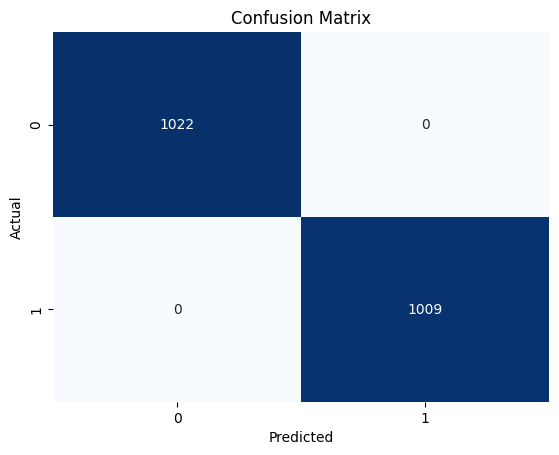

In [15]:
# Display Confusion Matrix
sns.heatmap(dtr_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Display ROC plot (Receiver Operating Characteristic)
dtr_roc_auc = roc_auc_score(y_test, dtr.predict_proba(x_test)[:,1])
print("ROC score:", dtr_roc_auc)

dtr_xgb = XGBClassifier(objective='binary:logistic', eval_metric='error', verbosity=0) 
dtr_xgb.fit(x_train, y_train)
dtr_y_pred_xgb = dtr_xgb.predict(x_test)
dtr_xgb_roc_auc = roc_auc_score(y_test, dtr_xgb.predict_proba(x_test)[:,1])

print("AUC Score:", dtr_xgb_roc_auc)

ROC score: 1.0
AUC Score: 1.0


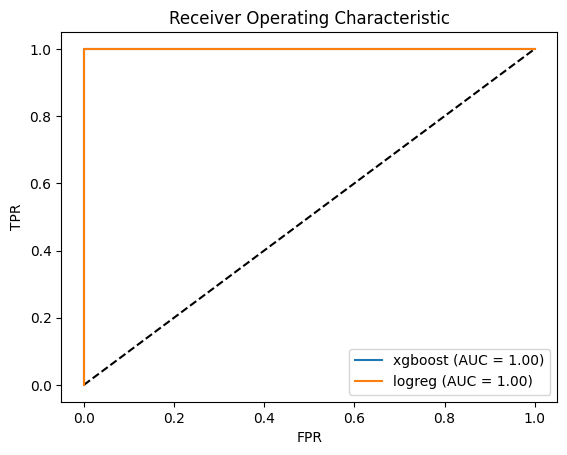

In [17]:
# ROC Graphs
y_pred_prob1 = dtr_xgb.predict_proba(x_test)[:, 1]
dtr_fpr1, dtr_tpr1, dtr_thresholds1 = roc_curve(y_test, y_pred_prob1)
dtr_auc1 = roc_auc_score(y_test, y_pred_prob1)

dtr_y_pred_prob2 = dtr.predict_proba(x_test)[:, 1]
dtr_fpr2, dtr_tpr2, dtr_thresholds2 = roc_curve(y_test, dtr_y_pred_prob2)
dtr_auc2 = roc_auc_score(y_test, dtr_y_pred_prob2)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(dtr_fpr1, dtr_tpr1, label="xgboost (AUC = %0.2f)" % dtr_auc1)
plt.plot(dtr_fpr2, dtr_tpr2, label="logreg (AUC = %0.2f)" % dtr_auc2)

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [18]:
# Display Precision-recall Curve

dtr_y_scores = dtr.predict_proba(x_test)[:, 1]

dtr_precision, dtr_recall, dtr_thresholds = precision_recall_curve(y_test, dtr_y_scores)
dtr_auc_score = auc(dtr_recall, dtr_precision)

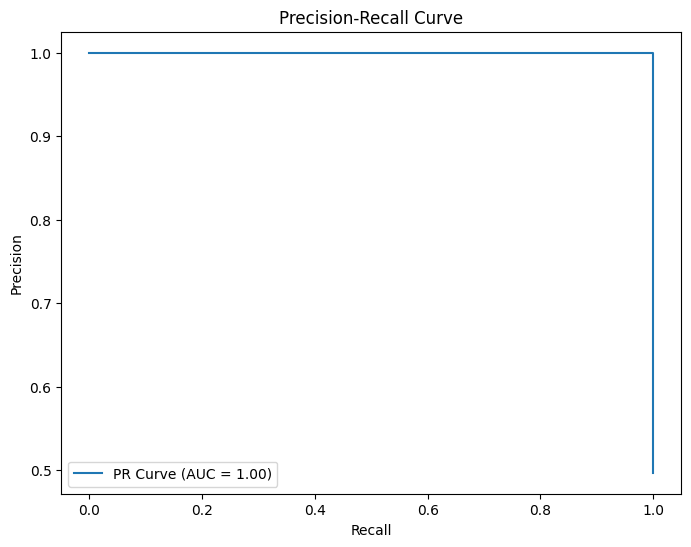

In [19]:
# Precision-recall Curve Graph
plt.figure(figsize=(8, 6))
plt.plot(dtr_recall, dtr_precision, label=f'PR Curve (AUC = {dtr_auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### K-Nearest Neighbor Classification   
For this experiment, the data will be examined using the k-nn method (K-Nearest Neighbors).

In [20]:
# k-NN Regression Setup
knn = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)

# Predict on training set
knn_pred = knn.predict(x_test)

# Metric Calculations
knn_pred_discrete = np.round(knn_pred).astype(int)
knn_acc_scr = accuracy_score(y_test, knn_pred_discrete)               # Accuracy Score
knn_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred_discrete))    # Confusion Matrix
knn_cr = classification_report(y_test, knn_pred_discrete)             # Classification Report

# Printing Metrics
print('Metrics:')
print(f'- Accuracy Score: {knn_acc_scr}')
print('- Confusion Matrix:')
print(knn_cm)
print('- Classification Report:')
print(knn_cr)

Metrics:
- Accuracy Score: 1.0
- Confusion Matrix:
      0     1
0  1022     0
1     0  1009
- Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1022
         1.0       1.00      1.00      1.00      1009

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



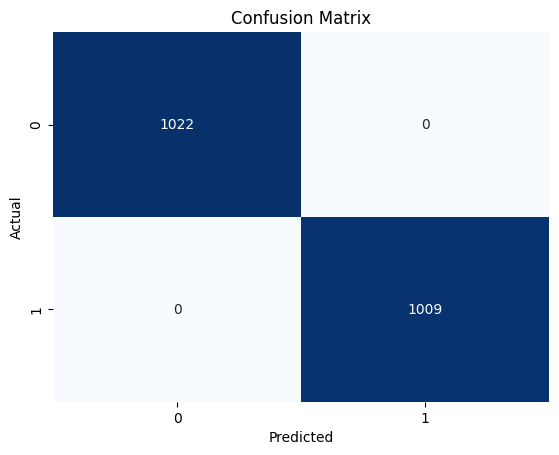

In [21]:
# Display Confusion Matrix
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradio Function

In [22]:
c_shape_map = {
    "bell"    : 0,
    "conical" : 0.20,
    "flat"    : 0.40, 
    "knobbed" : 0.60,
    "sunken"  : 0.80,
    "convex"  : 1
}
c_surface_map = {
    "grooves" : 0.00,
    "fibrous" : 0.33,
    "smooth"   : 0.67,
    "scaly"  : 1.00
}
c_color_map = {
    "buff"     : 0.00,
    "cinnamon" : 0.11,
    "red"      : 0.22,
    "gray"     : 0.33,
    "brown"    : 0.44,
    "pink"     : 0.56,
    "green"    : 0.67, 
    "purple"   : 0.78,
    "white"    : 0.89,
    "yellow"   : 1.00
}
    
bruises_map = {
    "no"  : 0.00,
    "yes" : 1.00
}
odor_map = { 
    "almond"   : 0.00, 
    "creosote" : 0.13, 
    "foul"     : 0.25, 
    "anise"    : 0.38, 
    "musty"    : 0.50, 
    "none"     : 0.63, 
    "pungent"  : 0.75, 
    "spicy"    : 0.88, 
    "fishy"    : 1.00
}
    
g_attachment_map = {
    "attached"  : 0.00, 
    "descending" : 0.33, 
    "free"       : 0.67, 
    "notched"    : 1.00
}
g_spacing_map =  { 
    "close"  : 0.00, 
    "distant" : 0.50, 
    "crowded" : 1.00
}
g_size_map = {
    "broad"  : 0.00, 
    "narrow" : 1.00
}
g_color_map = {
    "buff"      : 0.00,
    "red"       : 0.09,
    "gray"      : 0.18,
    "chocolate" : 0.27,
    "black"     : 0.36,
    "brown"     : 0.45,
    "orange"    : 0.55, 
    "pink"      : 0.64,
    "green"     : 0.73,
    "purple"    : 0.82,
    "white"     : 0.91,
    "yellow"    : 1.00
}
    
s_shape_map = {
    "enlarging"  : 0.00, 
    "tapering"   : 1.00
}
s_root_map = { 
    "missing"     : 0.00, 
    "bulbous"     : 0.17, 
    "club"        : 0.33, 
    "equal"       : 0.50, 
    "rooted"      : 0.67,
    "cup"         : 0.83, 
    "rhizomorphs" : 1.00
}
s_sur_above_ring_map = { 
    "fibrous"  : 0.00,
    "silky"    : 0.33, 
    "smooth"   : 0.67, 
    "scaly"    : 1.00
}
s_sur_below_ring_map = { 
    "fibrous"  : 0.00, 
    "silky"    : 0.33, 
    "smooth"   : 0.67, 
    "scaly"    : 1.00
}
s_col_above_ring_map = {
    "buff"     : 0.00,
    "cinnamon" : 0.13,
    "red"      : 0.25,
    "gray"     : 0.38,
    "brown"    : 0.50,
    "orange"   : 0.63,
    "pink"     : 0.75, 
    "white"    : 0.88,
    "yellow"   : 1.00
}
s_col_below_ring_map = {
    "buff"     : 0.00,
    "cinnamon" : 0.13,
    "red"      : 0.25,
    "gray"     : 0.38,
    "brown"    : 0.50,
    "orange"   : 0.63,
    "pink"     : 0.75, 
    "white"    : 0.88,
    "yellow"   : 1.00
}

v_t_map = { 
    "partial"   : 0.00, 
    "universal" : 1.00
}
v_c_map = { 
    "brown"  : 0.00, 
    "orange" : 0.33, 
    "white"  : 0.67, 
    "yellow" : 1.00
}
r_n_map = {
    "none" : 0.00, 
    "one"  : 0.50, 
    "two"  : 1.00
}
r_t_map = { 
    "cobwebby"   : 0.00,
    "evanescent" : 0.14, 
    "flaring"    : 0.29, 
    "large"      : 0.43, 
    "none"       : 0.57, 
    "pendant"    : 0.71, 
    "sheathing"  : 0.86, 
    "zone"       : 1.00
}
spore_p_c_map = {
    "buff"      : 0.00,
    "chocolate" : 0.13,
    "black"     : 0.25,
    "brown"     : 0.38,
    "orange"    : 0.50,
    "green"     : 0.63,
    "purple"    : 0.75,
    "white"     : 0.88,
    "yellow"    : 1.00
}
pop_map = { 
    "abundant"  : 0.00, 
    "clustered" : 0.20, 
    "numerous"  : 0.40, 
    "scattered" : 0.60, 
    "several"   : 0.80, 
    "solitary"  : 1.00
}
hab_map = { 
    "woods"   : 0, 
    "grasses" : 0.17, 
    "leaves"  : 0.33, 
    "meadows" : 0.50, 
    "paths"   : 0.67, 
    "urban"   : 0.83, 
    "waste"   : 1 
}

def mushroom_classification(cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, gill_spacing, gill_size, gill_color, stalk_shape, stalk_root, stalk_surface_above_ring, stalk_surface_below_ring, stalk_color_above_ring, stalk_color_below_ring, veil_type, veil_color, ring_number, ring_type, spore_print_color, population, habitat):

    c_shape = c_shape_map.get(cap_shape, 0)
    c_surface = c_surface_map.get(cap_surface, 0)
    c_color = c_color_map.get(cap_color, 0)
    bruises = bruises_map.get(bruises, 0)
    odor = odor_map.get(odor, 0)
    g_attachment = g_attachment_map.get(gill_attachment, 0)
    g_spacing = g_spacing_map.get(gill_spacing, 0)
    g_size = g_size_map.get(gill_size, 0)
    g_color = g_color_map.get(gill_color, 0)
    s_shape = s_shape_map.get(stalk_shape, 0)
    s_root = s_root_map.get(stalk_root, 0)
    s_sur_above_ring = s_sur_above_ring_map.get(stalk_surface_above_ring, 0)
    s_sur_below_ring = s_sur_below_ring_map.get(stalk_surface_below_ring, 0)
    s_col_above_ring = s_col_above_ring_map.get(stalk_color_above_ring, 0)
    s_col_below_ring = s_col_below_ring_map.get(stalk_color_above_ring, 0)
    v_t = v_t_map.get(veil_type, 0)
    v_c = v_c_map.get(veil_color, 0)
    r_n = r_n_map.get(ring_number, 0)
    r_t = r_t_map.get(ring_type, 0)
    spore_p_c = spore_p_c_map.get(spore_print_color, 0)
    pop = pop_map.get(population, 0)
    hab = hab_map.get(habitat, 0)

    inp = np.array([[c_shape, c_surface, c_color, bruises, odor, g_attachment, g_spacing, g_size, g_color, s_shape, 
                     s_root, s_sur_above_ring, s_sur_below_ring, s_col_above_ring, s_col_below_ring, v_t, v_c,
                     r_n, r_t, spore_p_c, pop, hab]])

    # Decision tree regression
    dtr_user_pred = dtr.predict(inp)[0]

    user_results_map = {
        0 : "Your mushroom is not poisonous! It is quite edible.",
        1 : "Your mushroom is poisonous! Don't eat it."
    }
    user_results = user_results_map.get(dtr_user_pred)
    
    
    return user_results

## Gradio Interface

In [23]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("# Mushroom Classification")
    gr.Markdown("A data driven model to evaluate if the mushroom you currently have is poisonous or edible!")
    
    with gr.Tab("Cap Attributes"):
        cap_shape = gr.Dropdown(
            choices=["bell", "conical", "convex", "flat", "knobbed", "sunken"],
            label="Select a cap shape",
            value="bell", # default selection
            multiselect=False
        )
        cap_surface = gr.Dropdown(
            choices=["fibrous", "grooves", "scaly", "smooth"],
            label="Select a cap surface",
            value="fibrous", # default selection
            multiselect=False
        )
        cap_color = gr.Dropdown(
            choices=["brown", "buff", "cinnamon", "gray", "green", "pink", "purple", "red", "white", "yellow"],
            label="Select a cap color",
            value="brown", # default selection
            multiselect=False
        )
        bruises = gr.Dropdown(
            choices=["no", "yes"],
            label="is it bruised?",
            value="no", # default selection
            multiselect=False
        )
        odor = gr.Dropdown(
            choices=["almond", "anise", "creosote", "fishy", "foul", "musty", "none", "pungent", "spicy"],
            label="Select a odor",
            value="none", # default selection
            multiselect=False
        )
    with gr.Tab("Gill Attributes"):
        gill_attachment = gr.Dropdown(
            choices=["attached", "descending", "free", "notched"],
            label="Select a gill attachment",
            value="attached", # default selection
            multiselect=False
        )
        gill_spacing = gr.Dropdown(
            choices=["close", "crowded", "distant"],
            label="Select gill spacing",
            value="close", # default selection
            multiselect=False
        )
        gill_size = gr.Dropdown(
            choices=["broad", "narrow"],
            label="Select a gill size",
            value="broad", # default selection
            multiselect=False
        )
        gill_color = gr.Dropdown(
            choices=["black", "brown", "buff", "chocolate", "gray", "green", "orange", "pink", "purple", "red", "white", "yellow"],
            label="Select a gill color",
            value="black", # default selection
            multiselect=False
        )
    with gr.Tab("Stalk Attributes"):
        stalk_shape = gr.Dropdown(
            choices=["enlarging", "tapering"],
            label="Select a stalk shape",
            value="enlarging", # default selection
            multiselect=False
        )
        stalk_root = gr.Dropdown(
            choices=["bulbous", "club", "cup", "equal", "rhizomorphs", "rooted", "missing"],
            label="Select a stalk root",
            value="bulbous", # default selection
            multiselect=False
        )
        stalk_surface_above_ring = gr.Dropdown(
            choices=["fibrous", "scaly", "silky", "smooth"],
            label="Select a stalk surface above ring",
            value="fibrous", # default selection
            multiselect=False
        )
        stalk_surface_below_ring = gr.Dropdown(
            choices=["fibrous", "scaly", "silky", "smooth"],
            label="Select a stalk surface below ring",
            value="fibrous", # default selection
            multiselect=False
        )
        stalk_color_above_ring = gr.Dropdown(
            choices=["brown", "buff", "cinnamon", "gray", "orange", "red", "white", "yellow"],
            label="Select a stalk surface above ring color",
            value="brown", # default selection
            multiselect=False
        )
        stalk_color_below_ring = gr.Dropdown(
            choices=["brown", "buff", "cinnamon", "gray", "orange", "red", "white", "yellow"],
            label="Select a stalk color below ring",
            value="brown", # default selection
            multiselect=False
        )
    with gr.Tab("Other Attributes"):
        veil_type = gr.Dropdown(
            choices=["partial", "universal"],
            label="Select a veil type",
            value="partial", # default selection
            multiselect=False
        )
        veil_color = gr.Dropdown(
            choices=["brown", "orange", "white", "yellow"],
            label="Select a veil color",
            value="brown", # default selection
            multiselect=False
        )
        ring_number = gr.Dropdown(
            choices=["none", "one", "two"],
            label="Select a ring number",
            value="none", # default selection
            multiselect=False
        )
        ring_type = gr.Dropdown(
            choices=["cobwebby", "evanescent", "flaring", "large", "none", "pendant", "sheathing", "zone"],
            label="Select a ring type",
            value="none", # default selection
            multiselect=False
        )
        spore_print_color = gr.Dropdown(
            choices=["black", "brown", "buff", "chocolate", "green", "orange", "purple", "white", "yellow"],
            label="Select a spore print color",
            value="black", # default selection
            multiselect=False
        )
        population = gr.Dropdown(
            choices=["abundant", "clustered", "numerous", "scattered", "several", "solitary"],
            label="Select a population",
            value="abundant", # default selection
            multiselect=False
        )
        habitat = gr.Dropdown(
            choices=["woods", "grasses", "leaves", "meadows", "paths", "urban", "waste"],
            label="Select a habitat",
            value="woods", # default selection
            multiselect=False
        )
        
    submit_btn = gr.Button("Submit", variant="primary")
    text_output = gr.Textbox(label="Result", lines=2)
    
    reset_btn = gr.Button("Reset")
    
    inputs = [cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, gill_spacing, gill_size, 
              gill_color, stalk_shape, stalk_root, stalk_surface_above_ring, stalk_surface_below_ring,
              stalk_color_above_ring, stalk_color_below_ring, veil_type, veil_color, ring_number, ring_type,
              spore_print_color, population, habitat]
    
    submit_btn.click(mushroom_classification, inputs=inputs, outputs=text_output)
    reset_btn.click(lambda: ("bell", "fibrous", "brown", "no", "none", "attached", "close", "broad", "black", 
                             "enlarging", "bulbous", "fibrous", "fibrous", "brown", "brown", "partial", "brown", 
                             "none", "none", "black", "abundant", "woods"), outputs=inputs)

In [24]:
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://897b0d41b1621e9fbd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Critical Summary
### 1. Introduction
This project aims to create a functional, yet intuitive machine learning model concerning the classification of edible mushrooms to poisonous ones based upon their physical attributes as the analysis of such matter is imperative to avoid serious health complications that might come from the consumption of said food items. The motivation for this project mainly stems from the limitations that come from manual classification methods, mainly due their likelihood to lead to a wide range of errors when done by a non-specialist and the amount of time it takes for a proper assessment. The main contribution and findings that this study aims to provide is an accurate system that includes data preprocessing, model training and performance evaluation.

### 2. Problem Statement
Without expert knowledge, identifying whether or not a mushroom is edible or poisonous becomes quite a risky endeavor, where a single mistake can lead to the misclassification of data, making it likely that an individual ends up with an incorrect mushroom identification. To address this problem, this project seeks to offer a creative and efficient solution by allowing machine learning models to learn patterns from data and evaluate the mushroom’s toxicity to humans based on their physical features. The objectives of this study are as follows:
- To collect and analyze the mushroom dataset for supervised learning
- To implement data preprocessing techniques such as handling null data and scaling 
- To develop a system the works well to classify mushroom to either category: edible and poisonous 
- To achieve a 90% or higher classification accuracy and precision based on the performance metrics that will be used
- To provide clean and well-documented code

### 3. Data and Features
This mushroom classification dataset consisted of 8124 records with the following 23 features:
Classification
1. Cap-shape
2. Cap-surface
3. Cap-color
4. Bruises
5. Odor
6. Gill-attachment
7. Gill-spacing
8. Gill-size
9. Gill-color
10. Stalk-shape
11. Stalk-root
12. Stalk-surface-above-ring
13. Stalk-surface-below-ring
14. Stalk-color-above-ring
15. Stalk-color-below-ring
16. Veil-type
17. Veil-color
18. Ring-number
19. Ring-type
20. Spore-print-color
21. Population
22. Habitat
	
Before the development of the model, the data must be first properly prepared into usable data that the model can actually use. The following steps are done for this purpose
1. Check and delete any empty or null values in the dataset to ensure that each entry is fully functional.
2. Encode each string value into an ordinal scale to allow the model a way to understand how each value relates to one another.
3. Numeric data scaling must be done in order to say that each feature is equally important 
4. The data is finally allotted into X train, X test, y train, and y test which will be used for the model development.

### 4. Model development
Several classification algorithms were considered during the development of this project, with Decision Tree Regression being selected to be the primary model due to its interpretability and suitability for categorical data, but others like Dummy Classifier, and K-nn (K-Nearest Neighbor), were added for the purpose of providing more information to the researcher. All of which will be discussed here:

- Dummy classifier is a classifier that is used as a baseline for more sophisticated models. It uses pre-specified strategies to generate an general accuracy score, the strategies are as follows: most_frequent, stratified, uniform, and constant. For this project, the default strategy, most_frequent was used.
- Decision Tree classifier is a supervised learning model that is usually used for classifying data into categories, it will ask a series of questions that will split the data step-by-step with each split being based upon the features of the data. As mentioned before, this will be used as the main model for this paper.
- K-Nearest Neighbor Classification is a supervised learning model which works by finding the “k” closest data points to a given input, where k is a number which identifies the amount of data points or neighbors that are nearby the new data.

The metrics used for each classifier remain largely the same but with some exceptions where some metrics don’t work well with others models. With that being said, this paper will be focusing on the metrics found in decision tree classifiers. Which are the following:
- Accuracy Score is a metric that is used to evaluate the performance of a model by checking the amount of correctly predicted instances out of the total instances.
- Precision Score is a metric that is used to evaluate the accuracy of the positive predictions made by the model in case of any false positives. The average of which will be weighted which means that every feature that the dataset has is proportional to each other.
- Recall Score is a metric that is used to evaluate the accuracy of the actual positive data made by the model. The average of which will be weighted
- F1 Score is a metric that combines both precision and recall into a single value, it is often referred to as the harmonic mean of both variables. The average of which will be weighted
- Confusion Matrix is a table to evaluate the performance of a classification model, as it records true and false positives and negative outcomes.

### 5. Results and evaluation
In order to evaluate each model that was used in this paper, several metrics were used. To start the only metric dummy classification can use is accuracy, which it received a 0.50 or 50% which will be used as a baseline, the minimum accuracy score for other more sophisticated models.

Decision Tree Classifications 	received several metrics: accuracy, precision, recall, and F1 scores that can be used for data analysis. These metrics can be converted into diagrams that can help researchers interpret data. 

- First - Accuracy Score, it received an accuracy score of 1.0 or 100% which indicates that it was able to correctly identify 100% of the predicted instances out of the total instances. 
- Second - Precision Score, it received a precision score of 1.0 or 100% which indicates that it was able to identify 100% of the positive instances correctly.
- Third - Recall Score, it received a recall score of 1.0 or 100% which indicates that it was able to identify 100% of the actual instances correctly.
- Fourth - F1 Score, it received a recall score of 1.0 or 100% which indicates that there was no tradeoff between the precision and recall score.
- Lastly - Confusion Matrix, it received a perfect evaluation for the classification model which indicates that theoretically it does not make any mistake when classifying data.

### 6. Conclusion and future work:
In conclusion, this project was a success in all of the objectives it set out to do. The model manages to not only be functional but highly accurate when classifying mushrooms. There is a Gradio application that allows users to test it out for themselves. For future works, there should be more of a focus on mushroom image recognition and perhaps a way to indicate the amount of toxicity that each mushroom can produce, which can allow for different classifications of, such as the six major groups proposed by the new clinical classification system: Cytotoxic mushroom poisoning, Neurotoxic mushroom poisoning, Myotoxic mushroom poisoning, Metabolic, endocrine, and related toxicity mushroom poisoning, gastrointestinal irritant mushroom, and the Miscellaneous adverse mushrooms.

### 7. References
scikit-learn (2019a). sklearn.dummy.DummyClassifier — scikit-learn 0.23.2 documentation. [online] scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html.

scikit-learn (2019b). sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. 

scikit-learn (2019c). sklearn.tree.DecisionTreeClassifier — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

Yu, X. (2022). Six groups of poisonous mushrooms: classified according to clinical symptoms. Highlights in Science, Engineering and Technology, 19, pp.216–222. doi:https://doi.org/10.54097/hset.v19i.2853. 